In [1]:
from newspaper import Article
from konlpy.tag import Kkma
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import numpy as np

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 데이터는 서울대 대나무숲
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('data1.txt').read()

In [3]:
from konlpy.tag import Okt
t = Okt()
tokens_ko = t.nouns(doc_ko)

In [4]:
ko = nltk.Text(tokens_ko, name='1sentence 분석')

In [5]:
print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens
ko.vocab()                        # returns frequency distribution

278
127


FreqDist({'너': 27, '내': 20, '네': 16, '나': 13, '마음': 8, '것': 6, '널': 6, '날': 5, '생각': 5, '말': 4, ...})

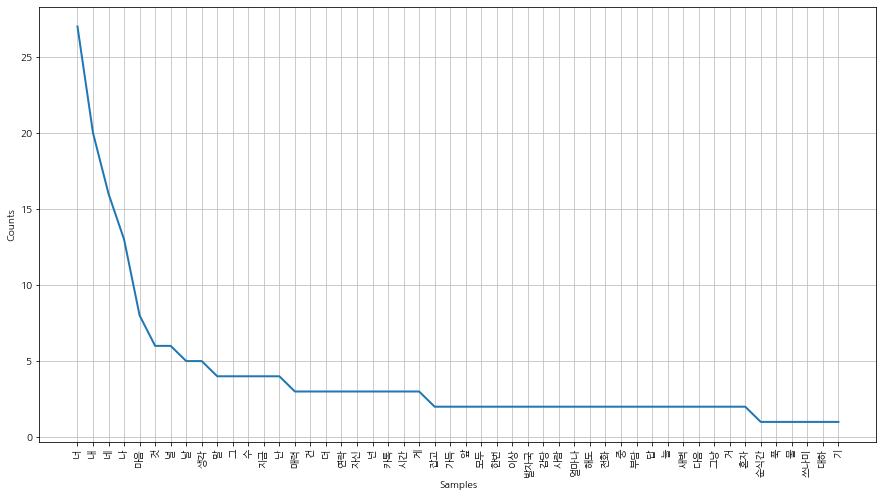

In [6]:
plt.figure(figsize=(15,8))
ko.plot(50) # Plot sorted frequency of top 50 tokens
plt.show()

In [7]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','이','점','왜','때','더',
              '내','말','거','그','좀','뭐','수','볼','나','걸','의','자','에','안','번',
              '호','을','이','다','만','로','가','를','것','듯','중']

ko = [each_word for each_word in ko if each_word not in stop_words]

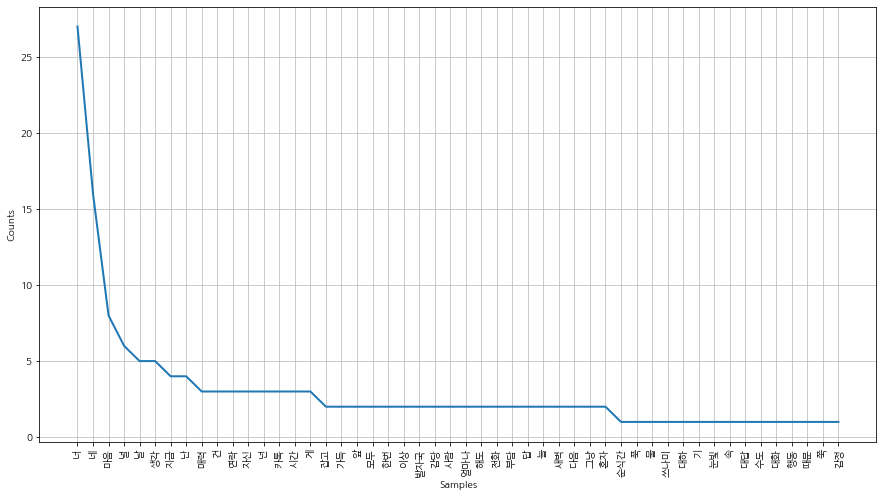

In [8]:
ko = nltk.Text(ko, name='1sentence')
plt.figure(figsize=(15,8))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

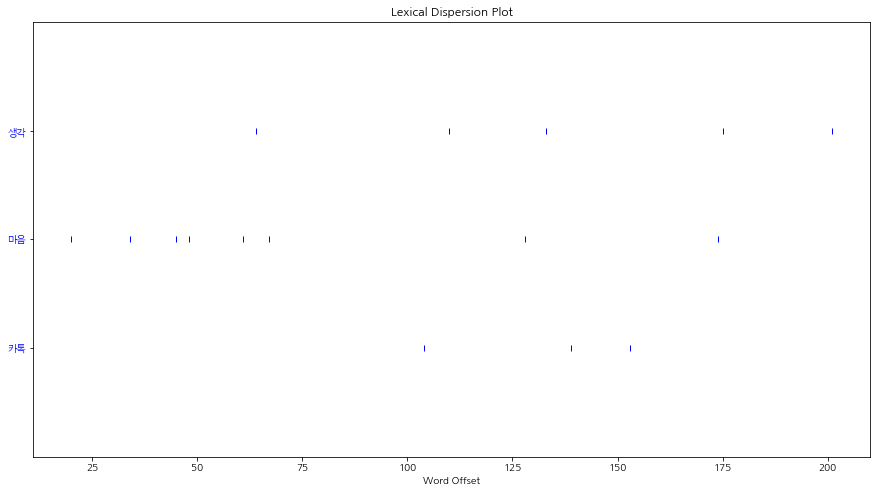

In [9]:
plt.figure(figsize=(15,8))
ko.dispersion_plot(['생각', '마음', '카톡'])

In [10]:
ko.concordance('너')

Displaying 25 of 27 matches:
 너 잡고 너 네 순식간 푹 너 물 너 매력 쓰나미 매력 네 너 대하 기 
너 잡고 너 네 순식간 푹 너 물 너 매력 쓰나미 매력 네 너 대하 기 너 눈빛 
너 잡고 너 네 순식간 푹 너 물 너 매력 쓰나미 매력 네 너 대하 기 너 눈빛 속 널 마음 가득 
너 잡고 너 네 순식간 푹 너 물 너 매력 쓰나미 매력 네 너 대하 기 너 눈빛 속 널 마음 가득 너 대답
너 잡고 너 네 순식간 푹 너 물 너 매력 쓰나미 매력 네 너 대하 기 너 눈빛 속 널 마음 가득 너 대답 가득 너 수도 너 대화 
 잡고 너 네 순식간 푹 너 물 너 매력 쓰나미 매력 네 너 대하 기 너 눈빛 속 널 마음 가득 너 대답 가득 너 수도 너 대화 네 앞 행동 
 물 너 매력 쓰나미 매력 네 너 대하 기 너 눈빛 속 널 마음 가득 너 대답 가득 너 수도 너 대화 네 앞 행동 모두 건 마음 네 때문 너 
쓰나미 매력 네 너 대하 기 너 눈빛 속 널 마음 가득 너 대답 가득 너 수도 너 대화 네 앞 행동 모두 건 마음 네 때문 너 쭉 너 한번 감
력 네 너 대하 기 너 눈빛 속 널 마음 가득 너 대답 가득 너 수도 너 대화 네 앞 행동 모두 건 마음 네 때문 너 쭉 너 한번 감정 너 한
 너 대답 가득 너 수도 너 대화 네 앞 행동 모두 건 마음 네 때문 너 쭉 너 한번 감정 너 한번 용기 마음 전 너 마음 이상 사이 몇 발자
답 가득 너 수도 너 대화 네 앞 행동 모두 건 마음 네 때문 너 쭉 너 한번 감정 너 한번 용기 마음 전 너 마음 이상 사이 몇 발자국 하자
도 너 대화 네 앞 행동 모두 건 마음 네 때문 너 쭉 너 한번 감정 너 한번 용기 마음 전 너 마음 이상 사이 몇 발자국 하자 너 날 확 이
 모두 건 마음 네 때문 너 쭉 너 한번 감정 너 한번 용기 마음 전 너 마음 이상 사이 몇 발자국 하자 너 날 확 이번 연락 네 한편 마음 
한번 감정 너 한번 용기 마음 전 너 마음 이상 사이 몇 발자국 하자 너 날 확 이번 연락 네 

In [11]:
class SentenceTokenizer(object):
    
    def __init__(self):
        self.kkma = Kkma()
        self.Okt = Okt()
        self.stopwords = ['중인' ,'만큼', '마찬가지', '꼬집었', "연합뉴스", "데일리", "동아일보", "중앙일보", "조선일보", "기자"
,"아", "휴", "아이구", "아이쿠", "아이고", "어", "나", "우리", "저희", "따라", "의해", "을", "를", "에", "의", "가",]
    
    def url2sentences(self, url):
        article = Article(url, language='ko')
        article.download()
        article.parse()
        sentences = self.kkma.sentences(article.text)
        
        for idx in range(0, len(sentences)):
            if len(sentences[idx]) <= 10:
                sentences[idx-1] += (' ' + sentences[idx])
                sentences[idx] = ''
        return sentences
    
    def text2sentences(self, text):
        sentences = self.kkma.sentences(text)
        for idx in range(0, len(sentences)):
            if len(sentences[idx]) <= 10:
                sentences[idx-1] += (' ' + sentences[idx])
                sentences[idx] = ''
        return sentences
    
    def get_nouns(self, sentences):
        nouns = []
        for sentence in sentences:
            if sentence is not '':
                nouns.append(' '.join([noun for noun in self.Okt.nouns(str(sentence))
                    if noun not in self.stopwords and len(noun) > 1]))
        return nouns

In [12]:
class GraphMatrix(object):
    def __init__(self):
        self.tfidf = TfidfVectorizer()
        self.cnt_vec = CountVectorizer()
        self.graph_sentence = []
        
    def build_sent_graph(self, sentence):
        tfidf_mat = self.tfidf.fit_transform(sentence).toarray()
        self.graph_sentence = np.dot(tfidf_mat, tfidf_mat.T)
        return self.graph_sentence
    
    def build_words_graph(self, sentence):
        cnt_vec_mat = normalize(self.cnt_vec.fit_transform(sentence).toarray().astype(float), axis=0)
        vocab = self.cnt_vec.vocabulary_
        return np.dot(cnt_vec_mat.T, cnt_vec_mat), {vocab[word] : word for word in vocab}

In [13]:
class Rank(object):
    def get_ranks(self, graph, d=0.85): # d = damping factor
        A = graph
        matrix_size = A.shape[0]
        for id in range(matrix_size):
            A[id, id] = 0 # diagonal 부분을 0으로
            link_sum = np.sum(A[:,id]) # A[:, id] = A[:][id]
            if link_sum != 0:
                A[:, id] /= link_sum
            A[:, id] *= -d
            A[id, id] = 1
            
        B = (1-d) * np.ones((matrix_size, 1))
        ranks = np.linalg.solve(A, B) # 연립방정식 Ax = b
        return {idx: r[0] for idx, r in enumerate(ranks)}

In [14]:
class TextRank(object):
    def __init__(self, text):
        self.sent_tokenize = SentenceTokenizer()
        
        if text[:5] in ('http:', 'https'):
            self.sentences = self.sent_tokenize.url2sentences(text)
        else:
            self.sentences = self.sent_tokenize.text2sentences(text)
        
        self.nouns = self.sent_tokenize.get_nouns(self.sentences)
        
        self.graph_matrix = GraphMatrix()
        self.sent_graph = self.graph_matrix.build_sent_graph(self.nouns)
        self.words_graph, self.idx2word = self.graph_matrix.build_words_graph(self.nouns)
        
        self.rank = Rank()
        self.sent_rank_idx = self.rank.get_ranks(self.sent_graph)
        self.sorted_sent_rank_idx = sorted(self.sent_rank_idx, key=lambda k: self.sent_rank_idx[k], reverse=True)
        self.word_rank_idx = self.rank.get_ranks(self.words_graph)
        self.sorted_word_rank_idx = sorted(self.word_rank_idx, key=lambda k: self.word_rank_idx[k], reverse=True)
    
    def summarize(self, sent_num=3):
        summary = []
        index=[]
        for idx in self.sorted_sent_rank_idx[:sent_num]:
            index.append(idx)
        index.sort()
        for idx in index:
            summary.append(self.sentences[idx])
        return summary
    
    def keywords(self, word_num=10):
        rank = Rank()
        rank_idx = rank.get_ranks(self.words_graph)
        sorted_rank_idx = sorted(rank_idx, key=lambda k: rank_idx[k], reverse=True)
        
        keywords = []
        index=[]
        for idx in sorted_rank_idx[:word_num]:
            index.append(idx)
        
        #index.sort()
        for idx in index:
            keywords.append(self.idx2word[idx])
            
        return keywords

In [15]:
url = 'https://brunch.co.kr/@adamneve3/188'
textrank = TextRank(url)
for row in textrank.summarize(3):
    print(row)
    print()
print('keywords :',textrank.keywords())

그러나 사회는 외로운 이를 욕하는데 거리낌 없다. 이유는 간단하다.



포르노 중독. 외로워서 걸리는 병. 모든 중독성 정신질환 중 가장 고치기 쉬운 병. 치료법은 간단하며 유일하다.

keywords : ['사람', '외로움', '대한', '생각', '자신', '외로', '사랑', '모든', '가장', '혼자']


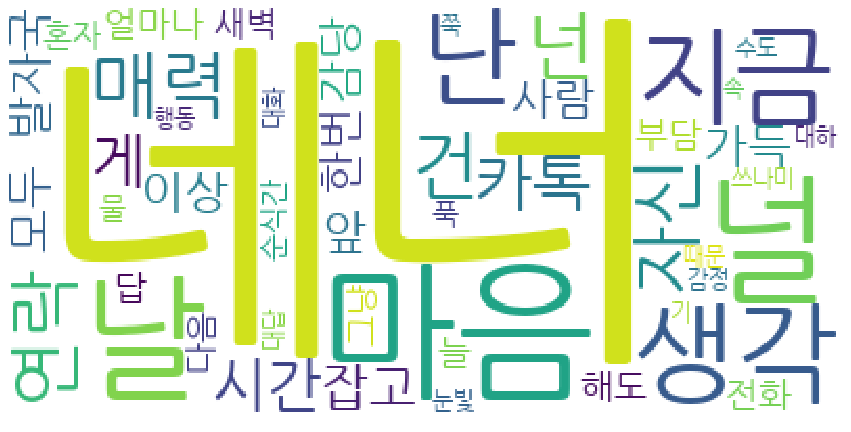

In [16]:
data = ko.vocab().most_common(50)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/NanumGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()